In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from collections import Counter
autos = pd.read_csv('autos.csv', encoding = 'Latin 1')
print(autos.columns)

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')


I thought an analisis on car price, what are the main predictors on price.

In [51]:
autos.columns
autos.rename(columns={'yearOfRegistration':'registration_year',
                          'monthofregistration':'registration_month',
                          'dataCreated':'ad_created'}, 
                 inplace=True)

autos['price'] = (autos['price'].replace('$','').replace(',','').astype(int))
autos['odometer'] = (autos['kilometer'].replace('km','').replace(',','').astype(int))


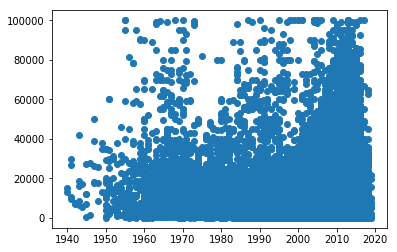

In [52]:
#retirar carros de luxo(carros com valor acima de 1 milhas) e carros de valor 0
autos = autos[autos['price'].between(10,100000)]
autos = autos[autos['odometer'].between(0,1000000)]
autos = autos[autos['registration_year'].between(1940,2020)]
price_auto = autos['price']
km_auto = autos['odometer']
year_auto = autos['registration_year']
plt.scatter(year_auto,price_auto)
plt.show()


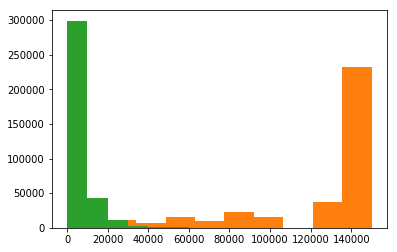

In [53]:
# histograma das idades dos carros por decada
grafico1 = plt.hist(year_auto, bins=10)
grafico2 = plt.hist(km_auto, bins=10)
grafico3 = plt.hist(price_auto,bins=10)
plt.show()

In [54]:
#preco medio dos carros entre as marcas  
unique_brands = ['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford', 'renault',
       'peugeot', 'fiat', 'seat', 'skoda', 'mazda', 'nissan', 'smart',
       'citroen', 'toyota', 'sonstige_autos']
brand_mean_price = {}
brand_mean_km = {}
for i in unique_brands:
    mean_price = autos['price'][autos['brand'] == i].mean()
    brand_mean_price[i] = mean_price
for i in unique_brands:
    mean_mileage = autos['odometer'][autos['brand'] == i].mean()
    brand_mean_km[i] = mean_mileage
print(brand_mean_price)
print(brand_mean_km)

{'volkswagen': 5328.737113066145, 'bmw': 8336.991323321781, 'opel': 2950.4756331741746, 'mercedes_benz': 8319.840188082315, 'audi': 8951.47155899978, 'ford': 3648.831952471406, 'renault': 2408.8959857167542, 'peugeot': 3238.9045762554533, 'fiat': 2869.6537019179254, 'seat': 4464.486934820904, 'skoda': 6466.781687612208, 'mazda': 4041.1475113122174, 'nissan': 4659.800367797303, 'smart': 3589.6890007745933, 'citroen': 3708.5523544605603, 'toyota': 5287.558829902492, 'sonstige_autos': 11606.61218147918}
{'volkswagen': 128687.45519713261, 'bmw': 133030.41971505585, 'opel': 129000.15569856757, 'mercedes_benz': 130859.72194003424, 'audi': 129758.57308693879, 'ford': 123972.03249403872, 'renault': 128089.32788112653, 'peugeot': 124889.07453819734, 'fiat': 117011.6789885353, 'seat': 121173.6641221374, 'skoda': 113763.01615798923, 'mazda': 125928.50678733032, 'nissan': 119673.0690641602, 'smart': 100398.9155693261, 'citroen': 120707.33161136499, 'toyota': 117279.5232936078, 'sonstige_autos': 90

In [55]:
# os termos em alemao foram substituidos
list_of_elements = Counter(autos['vehicleType'])
list_of_elements_2 = Counter(autos['fuelType'])
autos['vehicleType'] = (autos['vehicleType'].str.replace('limousine','sedan').str.replace('kombi','stationwagon').str.replace('andere','others').str.replace('cabrio','convertible').str.replace('kleinwagen','supermini'))
autos['fuelType'] = (autos['fuelType'].str.replace('lpg','Autogas').str.replace('andere','others').str.replace('benzin','gasoline'))
#tirando as - das datas
autos['dateCrawled'] = (autos['dateCrawled'].str.replace('-',''))
autos['lastSeen'] = (autos['lastSeen'].str.replace('-',''))